In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [18]:
# Chargement des données 
df = pd.read_csv("../data/cleaned_data.csv")
X = df[["open", "high", "low", "volume", "number_of_trades"]]
y = df["close"]

In [19]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

In [21]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"model": model, "mse": mse, "r2": r2, "predictions": y_pred}


In [22]:
print("\nÉvaluation des modèles :")
for name, res in results.items():
    print(f"{name:16} -> MSE : {res['mse']:.4f} | R² : {res['r2']:.4f}")



Évaluation des modèles :
Linear Regression -> MSE : 0.0022 | R² : 0.9983
Random Forest    -> MSE : 0.0033 | R² : 0.9974
XGBoost          -> MSE : 0.0035 | R² : 0.9972


In [24]:
best_model_name = min(results.items(), key=lambda x: x[1]["mse"])[0]
best_model = results[best_model_name]["model"]
joblib.dump(best_model, "models/best_model.pkl")
print(f"\n✅ Meilleur modèle : {best_model_name} (sauvegardé dans 'best_model.pkl')")



✅ Meilleur modèle : Linear Regression (sauvegardé dans 'best_model.pkl')


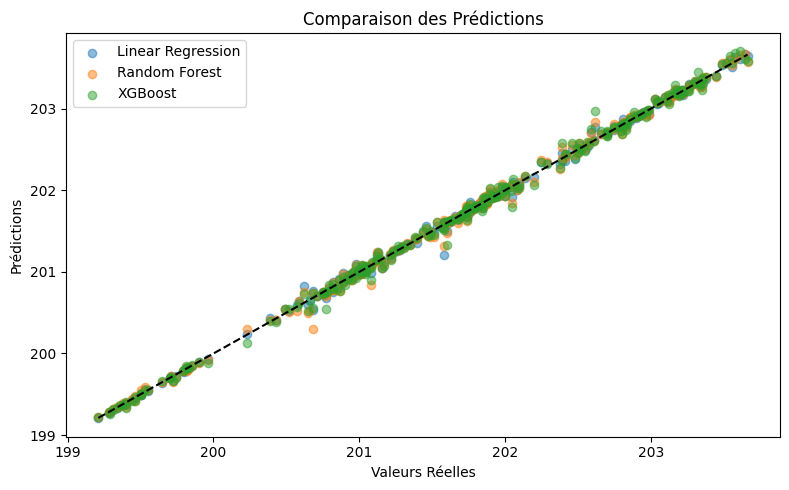

In [25]:
# Prédiction vs Réel
plt.figure(figsize=(8, 5))
for name, res in results.items():
    plt.scatter(y_test, res["predictions"], label=name, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison des Prédictions")
plt.legend()
plt.tight_layout()
plt.show()


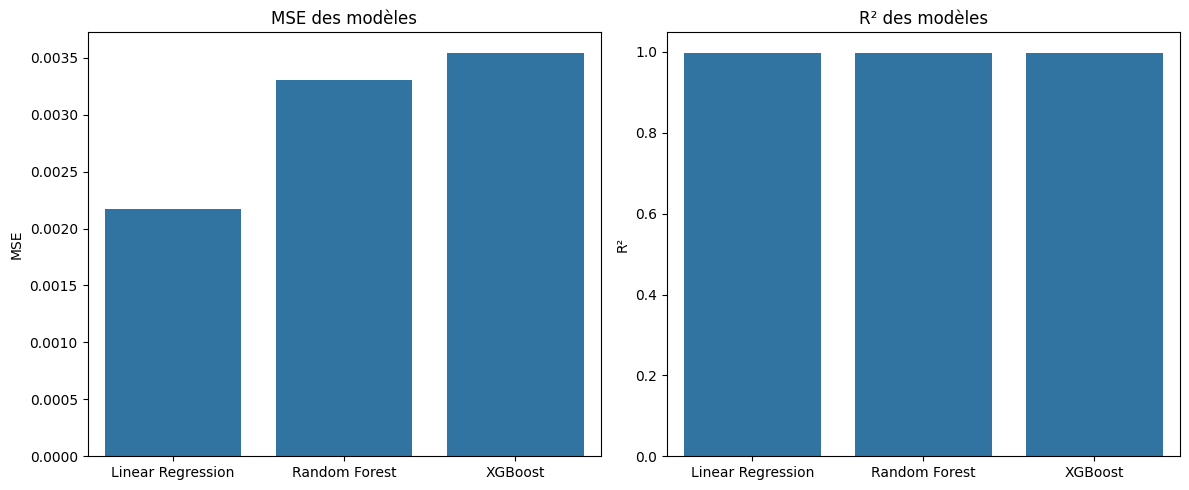

In [26]:
# Barplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=list(results.keys()), y=[res["mse"] for res in results.values()])
plt.title("MSE des modèles")
plt.ylabel("MSE")

plt.subplot(1, 2, 2)
sns.barplot(x=list(results.keys()), y=[res["r2"] for res in results.values()])
plt.title("R² des modèles")
plt.ylabel("R²")

plt.tight_layout()
plt.show()